In [1]:
import cirq 
import numpy as np 
import random 

In [2]:
def special(u):
    return u / (np.linalg.det(u) ** (1 / 4))


def random_unitary(n_qubits = 3):
    M = 2 ** n_qubits  # size of unitary matrix
    H = np.random.rand(M, M) + 1.9j * np.random.rand(M, M)
    H = H + H.conj().T
    D, U = np.linalg.eigh(H)
    return U

def random_diagonal(n_qubits = 3):
    return np.diag(random_unitary(n_qubits).diagonal())

def diagonalize(u):        
    eigvals, V = np.linalg.eig(u)

    d = np.diag(np.sqrt(eigvals))
#     np.testing.assert_almost_equal(V @ d @ d @ V.conj().T, u)
    return d,V


np.set_printoptions(suppress=True, precision=2)

In [3]:
for i in range(1000): 
    diagonalize(random_unitary(2))

In [4]:
for i in range(1000): 
    diagonalize(random_diagonal(2))

In [18]:
d = np.array([[ 9.99933043e-01-1.15719559e-02j,  2.27189354e-16-1.76583529e-17j, -5.55111512e-17+2.08166817e-16j,  5.55111512e-17+1.66533454e-16j],
       [-2.27537164e-16-1.23959254e-17j,  9.99933043e-01-1.15719559e-02j,  2.60998809e-18-3.75420002e-17j, -4.64138777e-17+4.72722989e-17j],
       [-1.38777878e-17+1.87350135e-16j, -3.47809964e-18-3.74715444e-17j,  9.99933043e-01-1.15719559e-02j, -2.22044605e-16-5.55111512e-17j],
       [-8.32667268e-17+1.38777878e-16j,  4.74954398e-17+4.61855116e-17j,  1.66533454e-16-1.11022302e-16j,  9.99933043e-01-1.15719559e-02j]])

In [23]:
# np.set_printoptions(suppress=False, precision=8)
D,V = np.linalg.eigh(d)

np.linalg.norm(V @ np.diag(D) @ V.conj().T - d)

0.023143911799999993

/Users/balintp/envs/cirq37/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


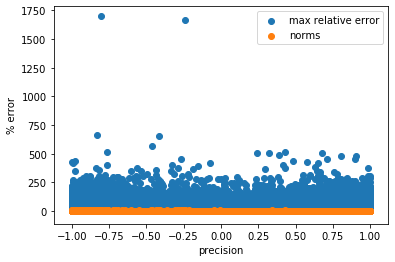

In [45]:
from matplotlib import pyplot as plt 
import numpy as np

xs = []
ys = []
md = []
norms = []
num_random = 200

for prec in range(40): 
    for i in range(num_random): 
        err = lambda : (random.random()*2-1 + (random.random()*2-1) * 1j) * 10**(-prec)
        r = err()
        r /= np.abs(r)  
        dd = np.eye(4) - np.diag([r,r,r,r]) 
        
        dr = ((np.random.random((4,4)) * 2 - 1) * 1j + (np.random.random((4,4)) * 2 - 1)) * 10**(-prec)
        
        d = dr - dr.diagonal() + dd 
                
        xs.append(r)
        diag, V = diagonalize(d)
    #     diff = np.abs(sum(sum(V @ diag @ diag @ V.conj().T - d))) / np.abs(np.max(d)) * 100 
#         diff2 = (np.abs(np.max(V @ diag @ diag @ V.conj().T)) / np.abs(np.max(d)) - 1) * 100 
#         diff = np.max(np.abs((V @ diag @ diag @ V.conj().T) / d - 1)) * 100 
        n = np.linalg.norm(V @ diag @ diag @ V.conj().T - d)
        nperc = np.linalg.norm(V @ diag @ diag @ V.conj().T - d) / np.linalg.norm(d) * 100
        norms.append(n)
        ys.append(nperc)
#         print(diff)
#         md.append(diff2)

plt.axes(xlabel="precision", ylabel="% error")
plt.scatter(xs,ys,label="max relative error")
plt.scatter(xs,norms,label="norms")
plt.legend()

In [8]:
np.set_printoptions(suppress=False, precision=8)
diagonalize(np.array([[ 1.-0.01j,  0.-0.j  , -0.+0.j  ,  0.+0.j  ],
       [-0.-0.j  ,  1.-0.01j,  0.-0.j  , -0.+0.j  ],
       [-0.+0.j  , -0.-0.j  ,  1.-0.01j, -0.-0.j  ],
       [-0.+0.j  ,  0.+0.j  ,  0.-0.j  ,  1.-0.01j]]))

(array([[1.0000125-0.00499994j, 0.       +0.j        ,
         0.       +0.j        , 0.       +0.j        ],
        [0.       +0.j        , 1.0000125-0.00499994j,
         0.       +0.j        , 0.       +0.j        ],
        [0.       +0.j        , 0.       +0.j        ,
         1.0000125-0.00499994j, 0.       +0.j        ],
        [0.       +0.j        , 0.       +0.j        ,
         0.       +0.j        , 1.0000125-0.00499994j]]),
 array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]]))

In [9]:
np.array([1,1]) / np.array([2,3])

array([0.5       , 0.33333333])

In [10]:
np.eye(2).diagonal()

array([1., 1.])

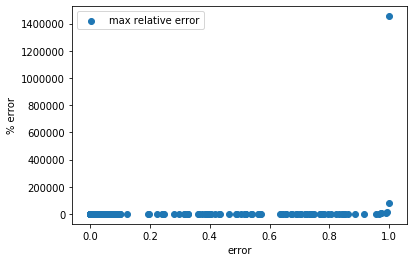

In [11]:
from matplotlib import pyplot as plt 

xs = []
ys = []
md = []
num_random = 100 

for prec in range(100): 
    for i in range(num_random): 
        r = random.random() * 10**(-prec)
        diff = (1 / (1-r) - 1) * 100 
        xs.append(r)
        ys.append(diff)
#         md.append(diff2)

plt.axes(xlabel="error", ylabel="% error")
plt.scatter(xs,ys,label="max relative error")
# plt.scatter(xs,md,label="md")
plt.legend()

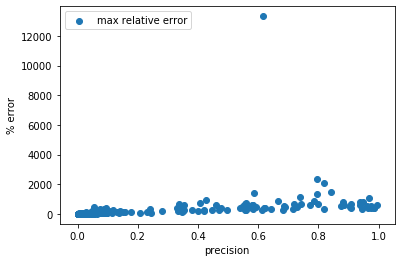

In [12]:
from matplotlib import pyplot as plt 

xs = []
ys = []
md = []
num_random = 100 

for prec in range(40): 
    for i in range(num_random): 
        d = random_unitary(2)
        r = random.random() * 10**(-prec)
        xs.append(r)
        diag, V = diagonalize(d - r)
    #     diff = np.abs(sum(sum(V @ diag @ diag @ V.conj().T - d))) / np.abs(np.max(d)) * 100 
        diff2 = (np.abs(np.max(V @ diag @ diag @ V.conj().T)) / np.abs(np.max(d)) - 1) * 100 
        diff = np.max(np.abs((V @ diag @ diag @ V.conj().T) / d - 1)) * 100 
        ys.append(diff)
#         print(diff)
#         md.append(diff2)

plt.axes(xlabel="precision", ylabel="% error")
plt.scatter(xs,ys,label="max relative error")
# plt.scatter(xs,md,label="md")
plt.legend()

In [13]:
u = random_unitary(2)

In [14]:
u

array([[ 0.68028449+0.j        , -0.40924599+0.j        ,
         0.23056163+0.j        ,  0.56264738+0.j        ],
       [-0.44644786+0.11037543j, -0.57294537-0.04709875j,
        -0.55545539-0.10450539j,  0.3506684 -0.12488592j],
       [ 0.07316933+0.38433714j,  0.60888517+0.02251576j,
        -0.19734677-0.41101091j,  0.43527875-0.27989248j],
       [-0.30495495-0.28222026j,  0.28695535-0.22009442j,
         0.13885427+0.63263975j,  0.52053381-0.07810423j]])

In [15]:
np.sqrt(u)

array([[0.8247936 +0.j        , 0.        +0.63972337j,
        0.48016833+0.j        , 0.75009825+0.j        ],
       [0.08198085+0.67317807j, 0.03108543-0.75756958j,
        0.06980515-0.7485507j , 0.60121184-0.10386182j],
       [0.48187623+0.39879239j, 0.78044426+0.01442496j,
        0.35957414-0.57152457j, 0.69021006-0.20275891j],
       [0.23510819-0.60019232j, 0.56947227-0.1932442j ,
        0.62711759+0.50440281j, 0.72349659-0.05397692j]])

In [16]:
np.linalg.svd(np.sqrt(u))

(array([[-0.43268106-0.22577167j,  0.49369606-0.03464265j,
         -0.45672433-0.21034111j, -0.30261081+0.4152885j ],
        [-0.27270023+0.29449201j, -0.03901126+0.68503416j,
          0.22618838-0.16357211j,  0.35568121+0.40458526j],
        [-0.59342566+0.09827053j,  0.12932611+0.25778598j,
          0.00198582+0.43141081j, -0.15288613-0.58780663j],
        [-0.4848878 -0.06161176j, -0.0356527 -0.4470128j ,
          0.43302352-0.54370386j,  0.21289879-0.17761505j]]),
 array([2.10463732, 1.58699674, 0.89101026, 0.19539512]),
 array([[-0.23983874+0.j        , -0.5235813 -0.01702339j,
         -0.49982064+0.18523959j, -0.61582726+0.06835652j],
        [ 0.81297131+0.j        , -0.23415653+0.2433635j ,
         -0.39515545+0.05907847j,  0.19599609-0.16422549j],
        [ 0.14911296+0.j        ,  0.3993486 -0.63878548j,
         -0.36992879+0.38858056j,  0.07511098+0.34169476j],
        [-0.50923507+0.j        , -0.01028879+0.20948914j,
         -0.50376513+0.12085552j,  0.62493429-0.

In [17]:
np.linalg.eig(u)

(array([-0.92662719+0.37598145j,  0.85290283+0.52206969j,
         0.86508033-0.50163335j, -0.36082982-0.93263168j]),
 array([[ 0.29712708+0.08190195j,  0.64177302+0.j        ,
          0.69664844+0.j        , -0.08311814-0.03012136j],
        [ 0.76980268+0.j        , -0.21100849+0.14285454j,
         -0.15698471-0.10744387j,  0.00739971-0.55337934j],
        [-0.02426838-0.425769j  ,  0.3065132 +0.30141369j,
         -0.12962113-0.13239359j,  0.7739519 +0.j        ],
        [-0.33345319+0.13911212j, -0.08218782+0.57588193j,
          0.16773921-0.64500111j, -0.20789568-0.20899394j]]))

In [44]:
np.linalg.norm(d-d)

0.0